In [1]:
import os
import pandas as pd
import lib.mb as mb
import lib.load as load
import time
from pyarrow import parquet as pq, Table as pt

# Testing Load times

In [2]:
with open('random_file_paths.txt', 'r') as f:
    paths = f.readlines()

paths = [path.strip() for path in paths]

In [16]:
%%time
snappy_paths = []
# Reading + Writing files in parquet w/ snappy

snappy_write_start = time.monotonic()

for n, file in enumerate(paths):
    df = pd.read_csv(file, sep='\t')
    path = f"unk_ids/snappy_parquet/{n}_snappy.parquet"
    snappy_paths.append(path)
    df.to_parquet(path, compression='snappy')

snappy_write_end = time.monotonic()
snappy_write_time = snappy_write_end - snappy_write_start
snappy_write_time

CPU times: user 7.99 s, sys: 612 ms, total: 8.6 s
Wall time: 8.5 s


8.50377750955522

In [20]:
%%time
zstd_paths = []
# Reading + writing files in parquet w/ zstd

zst_parquet_write_start = time.monotonic()
for n, file in enumerate(paths):
    df = pd.read_csv(file, sep='\t')
    path = f"unk_ids/zst_parquet/{n}_zst.parquet"
    zstd_paths.append(path)
    
    df = pt.from_pandas(df)
    pq.write_table(df, path, compression='zstd')

zst_parquet_write_end = time.monotonic()
zst_parquet_write_time = zst_parquet_write_end - zst_parquet_write_start
zst_parquet_write_time

CPU times: user 7.7 s, sys: 629 ms, total: 8.33 s
Wall time: 8.3 s


8.299434312619269

In [21]:
%%time
zstd_txt_paths = []

zst_txt_write_start = time.monotonic()
for n, file in enumerate(paths):
    df = pd.read_csv(file, sep='\t')
    path = f"unk_ids/zst_txt/{n}_zstd.txt.zst"
    zstd_txt_paths.append(path)
    
    df.to_csv(path, compression='zstd')

zst_txt_write_end = time.monotonic()
zst_txt_write_time = zst_txt_write_end - zst_txt_write_start
zst_txt_write_time

CPU times: user 22.4 s, sys: 403 ms, total: 22.8 s
Wall time: 23.2 s


23.18522241152823

In [22]:
%%time

## Loading parquet files
snappy_read_start = time.monotonic()

for file in snappy_paths:
    df = pd.read_parquet(file)

snappy_read_end = time.monotonic()
snappy_read_time = snappy_read_end - snappy_read_start
snappy_read_time

CPU times: user 2.09 s, sys: 143 ms, total: 2.23 s
Wall time: 1.51 s


1.5116015588864684

In [23]:
%%time

# Loading parquet files w/ zstd
zstd_parquet_read_start = time.monotonic()
for file in zstd_paths:
    df = pd.read_parquet(file)

zstd_parquet_read_end = time.monotonic()
zstd_parquet_read_time = zstd_parquet_read_end - zstd_parquet_read_start
zstd_parquet_read_time

CPU times: user 2.08 s, sys: 119 ms, total: 2.19 s
Wall time: 1.52 s


1.5165609065443277

In [24]:
%%time

zstd_txt_read_start = time.monotonic()

for file in zstd_txt_paths:
    df = pd.read_csv(file, sep='\t', compression='zstd')

zstd_txt_read_end = time.monotonic()
zstd_txt_read_time = zstd_txt_read_end - zstd_txt_read_start
zstd_txt_read_time

CPU times: user 4.41 s, sys: 288 ms, total: 4.7 s
Wall time: 4.7 s


4.701082368381321

In [27]:
%%time

csv_read_start = time.monotonic()
for file in paths:
    df = pd.read_csv(file, sep='\t')

csv_read_end = time.monotonic()
csv_read_time = csv_read_end - csv_read_start
csv_read_time

CPU times: user 4.84 s, sys: 284 ms, total: 5.13 s
Wall time: 5.13 s


5.131617600098252

## File Sizes

In [31]:
# CSV:
csv_size = 0
for file in paths:
    csv_size += os.path.getsize(file)

print(f"csv size = {csv_size/(1024*1024):.2f} MB")

csv size = 96.00 MB


In [36]:
# zstd txt:
zstd_txt_size = 0
for file in zstd_txt_paths:
    zstd_txt_size += os.path.getsize(file)

print(f"zstd text size = {zstd_txt_size/(1024*1024):.2f} MB")

zstd text size = 70.09 MB


In [37]:
# Snappy Parquet:

snappy_parquet_size = 0
for file in snappy_paths:
    snappy_parquet_size += os.path.getsize(file)

print(f"snappy parquet size = {snappy_parquet_size/(1024*1024):.2f} MB")

snappy parquet size = 75.96 MB


In [35]:
# ZSTD Parquet:
zstd_parquet_size = 0
for file in zstd_paths:
    zstd_parquet_size += os.path.getsize(file)

print(f"zstd parquet size = {zstd_parquet_size/(1024*1024):.2f} MB")

zstd parquet size = 46.84 MB


# Visualizations

In [38]:
import matplotlib.pyplot as plt

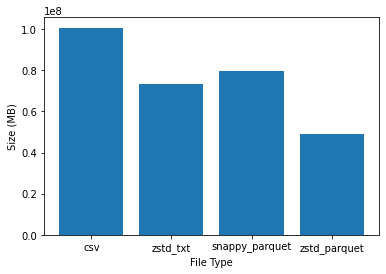

In [56]:
plt.bar(['csv', 'zstd_txt', 'snappy_parquet', 'zstd_parquet'], [csv_size, zstd_txt_size, snappy_parquet_size, zstd_parquet_size])
plt.xlabel('File Type')
plt.ylabel('Size (MB)')
plt.yticks()

plt.show()

Text(0, 0.5, 'Read Time (s)')

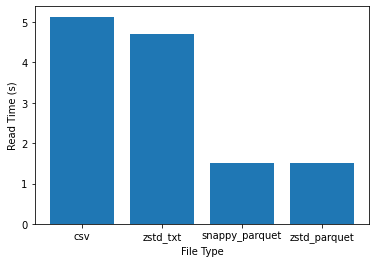

In [43]:
plt.bar(['csv', 'zstd_txt', 'snappy_parquet', 'zstd_parquet'], [csv_read_time, zstd_txt_read_time, snappy_read_time, zstd_parquet_read_time])
plt.xlabel('File Type')
plt.ylabel('Read Time (s)')

Text(0, 0.5, 'Write Time (s)')

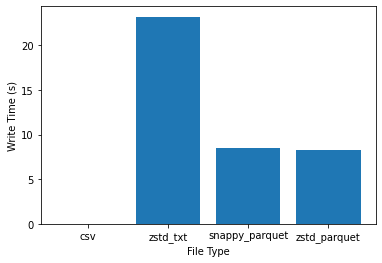

In [46]:
plt.bar(['csv', 'zstd_txt', 'snappy_parquet', 'zstd_parquet'], [0, zst_txt_write_time, snappy_write_time, zst_parquet_write_time])
plt.xlabel('File Type')
plt.ylabel('Write Time (s)')